In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

In [3]:
directorio ="/home/nataly/Documentos/mineria/datos/"
archi = 'temps.csv'
file=directorio+archi

df = pd.read_csv(file)
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [42]:
df.shape

(348, 12)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


tenemos una data  con una ingesta de 348 datos, 12 columnas, no vemos informacion sucia para nuestros datos  

In [4]:
df['actual'].value_counts()

57    16
60    16
68    16
65    13
55    12
71    12
64    11
52    11
59    11
67    11
51    10
77    10
75     9
63     9
66     9
49     9
76     9
73     8
53     8
48     8
54     8
61     8
74     7
56     7
58     7
40     6
62     6
81     6
79     6
80     5
69     5
72     5
45     4
44     4
85     4
46     4
50     4
70     4
82     3
42     3
41     3
39     3
47     2
35     2
78     2
83     2
87     2
90     1
84     1
43     1
86     1
88     1
89     1
36     1
92     1
Name: actual, dtype: int64

<AxesSubplot:>

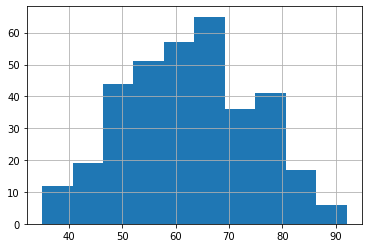

In [6]:
df['actual'].hist()

Estoy analisando la variable 'actual', ya que sera una de nuestras variables objetivos, queremos entender su distribucion de probabilidades, que vemos que se parece un poco a la normal, pero  lo complementaremos con un analisis basico de estadistica para encontrar sus valores de extremo

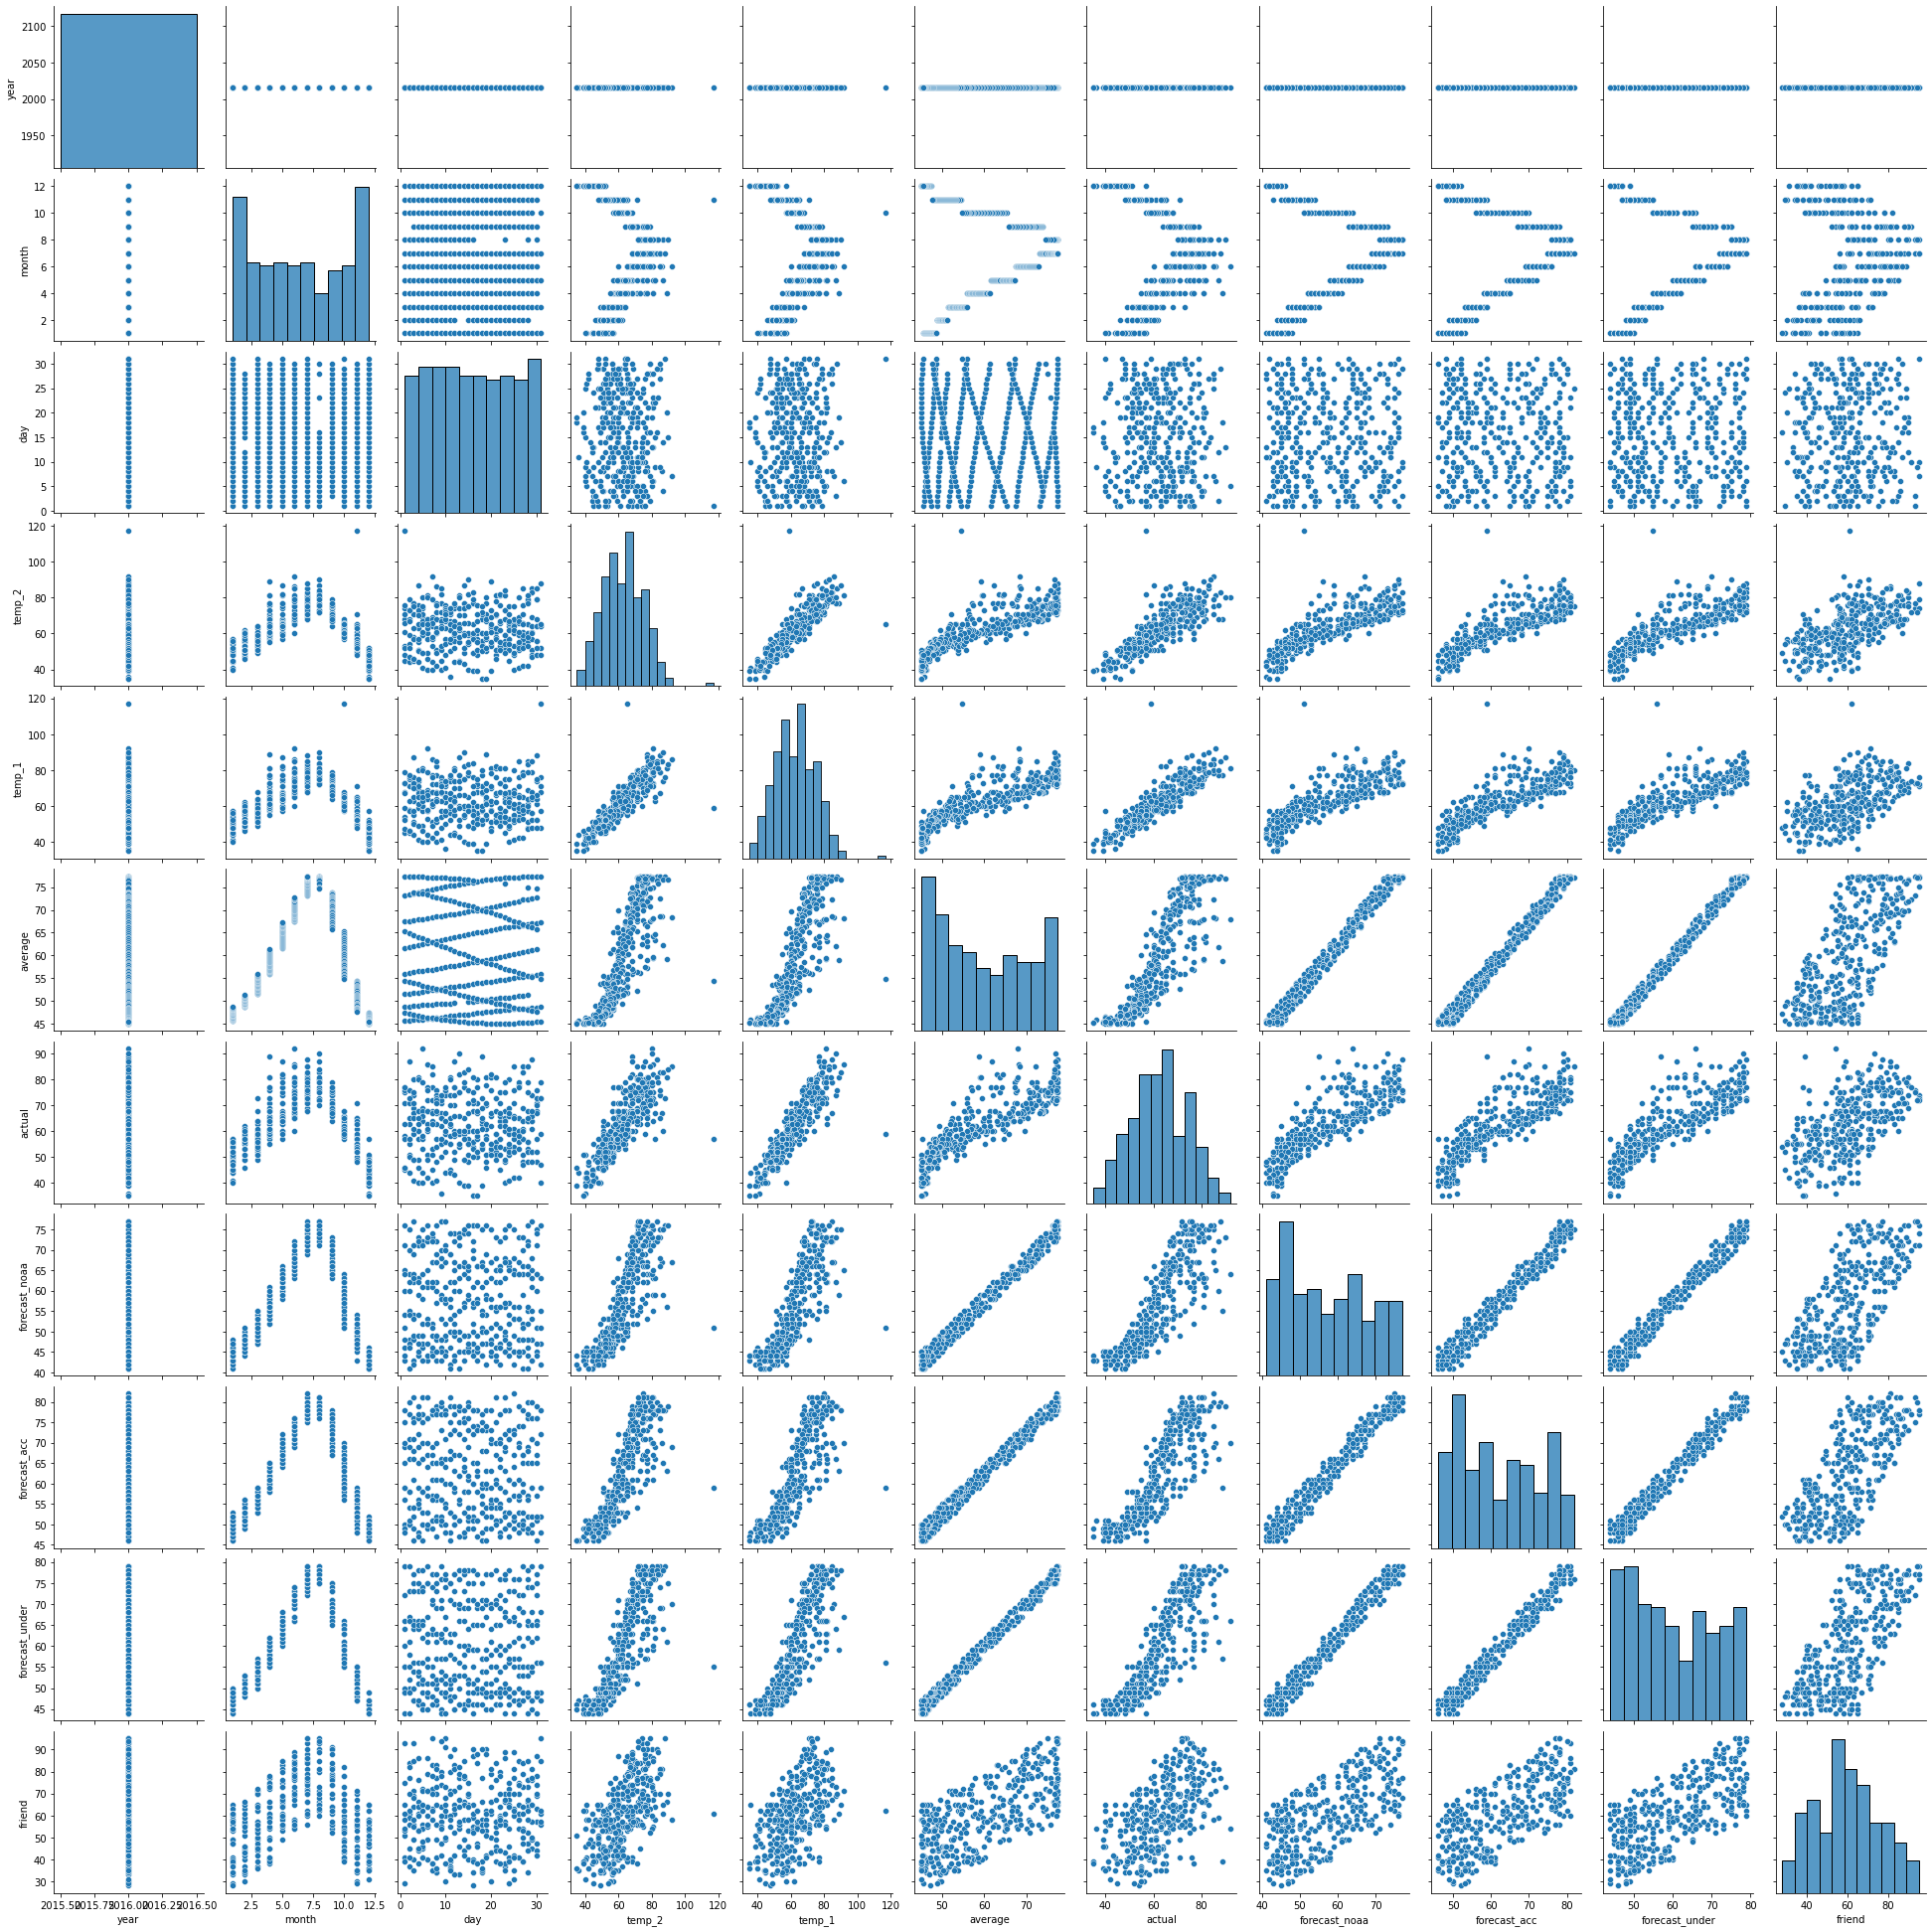

In [5]:
sns.pairplot(df)

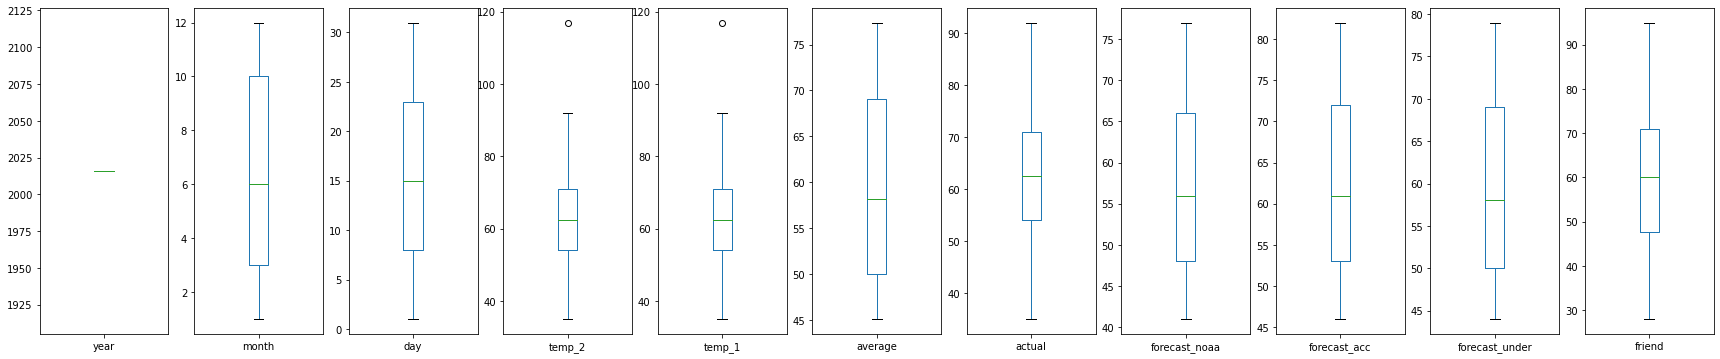

In [13]:
df.plot(kind='box', subplots=True, figsize=(30,6));

# Borrare la variable year, ya que solo contiene un solo valor

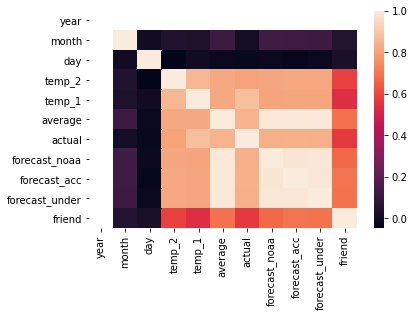

In [13]:
sns.heatmap(df.corr(method='pearson'));

In [8]:
df.corrwith(df['temp_2'], axis = 0)

year                   NaN
month             0.047651
day              -0.046194
temp_2            1.000000
temp_1            0.857800
average           0.821560
actual            0.805835
forecast_noaa     0.813134
forecast_acc      0.817374
forecast_under    0.819576
friend            0.583758
dtype: float64

In [9]:
df.corrwith(df['temp_1'], axis = 0)

year                   NaN
month             0.032664
day              -0.000691
temp_2            0.857800
temp_1            1.000000
average           0.819328
actual            0.877880
forecast_noaa     0.810672
forecast_acc      0.815162
forecast_under    0.815943
friend            0.541282
dtype: float64

In [26]:
df.corrwith(df['actual'], axis = 0)

year                   NaN
month             0.004529
day              -0.021675
temp_2            0.805835
temp_1            0.877880
average           0.848365
actual            1.000000
forecast_noaa     0.838639
forecast_acc      0.842135
forecast_under    0.838946
friend            0.569145
dtype: float64

In [7]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


Aunque no se encuentra un mapa de calor muy bien definido al nivel de las correlaciones pense en entender como es la descripcion de los datos y entender la interpretacion de las variables ('temp_2', 'temp_1', 'actual'), tanbien podemos interpretar que podemos borrar la variable year, ya que solo tiene un solo año

In [4]:
df = df.drop('year', axis=1)

In [5]:
df.head()

,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,1,1,Fri,45,45,45.6,45,43,50,44,29
1,1,2,Sat,44,45,45.7,44,41,50,44,61
2,1,3,Sun,45,44,45.8,41,43,46,47,56
3,1,4,Mon,44,41,45.9,40,44,48,46,53
4,1,5,Tues,41,40,46.0,44,46,46,46,41


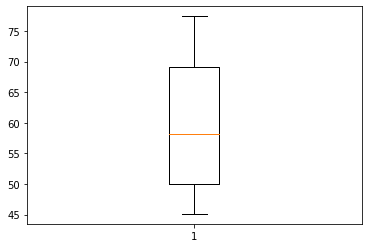

In [5]:
plt.boxplot(df['average']);
#plt.yscale('log')

# Encode de la variables week usando Dummies

In [6]:
df = pd.get_dummies(df)

Tendremos que hacer una normalizacion de la informacion

In [7]:
cols = [x for x in df.columns if x not in  ['actual']]

X = df[cols].values
y = df['actual'].values

In [8]:
scaler = MinMaxScaler(feature_range=(-1,1) )
scaler_y = MinMaxScaler()
X_scale = scaler.fit_transform(X)
y_scale = scaler_y.fit_transform(y.reshape(-1,1))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_scale, test_size=0.25, random_state=27)

# Randomfores Regresor

# Validación empleando el Out-of-Bag error

In [10]:
train_scores = []
oob_scores_   = []

# Valores evaluados

In [11]:
estimator_range = range(100)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error de entrenamiento y de Out-of-Bag.

In [12]:
modelo = RandomForestRegressor(
            n_estimators = 1000,
            criterion    = 'mse',
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 42
         )

In [13]:
modelo.fit(X_train, y_train)

<ipython-input-13-99b6c755ab91>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo.fit(X_train, y_train)


RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [14]:
from sklearn.model_selection import ParameterGrid

In [15]:
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.08213255320740444


Trasformacion de los datos normalisados, esto se hace para lograr evaluar la precisión del modelo

In [16]:
predicion_rf = scaler_y.inverse_transform(predicciones.reshape(-1,1))
y_test_rf    = scaler_y.inverse_transform(y_test)

In [17]:
r2_score(y_test_rf, predicion_rf)

0.818717052884645

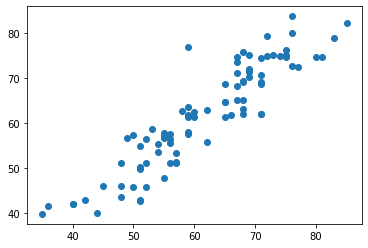

In [18]:
plt.scatter(y_test_rf , predicion_rf)

# Grid de hiperparámetros evaluados

In [35]:
param_grid = {'n_estimators': [1000],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20]
             }

# Búsqueda por grid search con validación cruzada

grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 42),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# En estos resultados  se veran proyectados en un dataframe por si queremos tener un orden  
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

/home/nataly/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
5,3,9,1000,-0.087543,0.011596,-0.073512,0.002566
4,3,7,1000,-0.088461,0.011995,-0.074836,0.002632
11,20,9,1000,-0.088946,0.012176,-0.033000,0.001092
2,None,9,1000,-0.088946,0.012176,-0.033000,0.001092


Cual es nuestro mejor parametro dejando fijo el numero de arboles y una semilla para generar el estado aleatorio

In [34]:
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'max_depth': 3, 'max_features': 9, 'n_estimators': 1000} : -0.0875431923580615 neg_root_mean_squared_error


el mejor parametro es el de numero 5, con una precision del 81%, veremos si con los otros modelos propuestos podemos mejorar un 0.09%

# Importancia por pureza de nodos

In [61]:
importancia_predictores = pd.DataFrame(
                            {'predictor': df.drop(columns = "actual").columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
3,temp_1,0.594769
4,average,0.203782
6,forecast_acc,0.079117
5,forecast_noaa,0.025222
8,friend,0.021839
2,temp_2,0.020310
1,day,0.017974
7,forecast_under,0.009148
0,month,0.008412
12,week_Sun,0.004297


el grado de importancia de las variables con respecto a la pureza de los nodos la organizamos de mayor a menor, la variable que mas aporta al modelo es temp_1

# Decision Tree Regressor

# SVM

In [31]:
regr_poly = svm.SVR(kernel='poly',C=100, gamma='auto', degree=4, epsilon=.1, coef0=1)
regr_line = svm.SVR(kernel='linear', C=100, gamma='auto')
regr_rbf = svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

regr_poly.fit(X_train, y_train)
regr_line.fit(X_train, y_train)
regr_rbf.fit(X_train, y_train) 

/home/nataly/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/nataly/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/nataly/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(C=100, gamma=0.1)

In [33]:
regr_rbf

SVR(C=100, gamma=0.1)

In [ ]:
predicciones = modelo.predict(X = X_test)

In [35]:
predicion_rf = scaler_y.inverse_transform(regr_rbf)
y_test_rf    = scaler_y.inverse_transform(predicion_rf.reshape(-1,1))

TypeError: float() argument must be a string or a number, not 'SVR'

In [28]:
ypred_rbf    = scaler_y.predict(X_test)
val_pred_rbf = scaler_y.inverse_transform(ypred_rbf)

AttributeError: 'numpy.ndarray' object has no attribute 'inverse_transform'

In [25]:
ypred_line    = regr_line.predict(X_test)
val_pred_line      = scaler_y.inverse_transform(y_test)

In [26]:
ypred_poly    = regr_poly.predict(X_test)
val_pred_poly = scaler_y.inverse_transform(ypred_poly)

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.65437968  0.39318319  0.58561272  0.64734109  0.45446643  0.10672875
  0.40824029  0.21460398  0.4212365   0.29840385  0.43082339  0.77761241
  0.1646389   0.91634117  0.86296812  0.82388295  0.42940408  0.00298166
  0.43330605  0.15752991 -0.03989962  0.41613096  0.48845334  0.26129457
  0.14887462  0.46419517  0.42129577  0.38595249  0.70446045  0.76598818
  0.85554276  0.63088066  0.4099803   0.47308135  0.21225762  0.53707157
  0.09441081  0.49780184  0.43063847  0.34633029  0.58151956  0.75300413
  0.18513984  0.76456298  0.8483766   0.60472092  0.75697926  0.49602686
  0.38463983  0.1083524   0.42714271  0.56589281  0.52188726  0.34951118
  0.05285622  0.80423274  0.35251661  0.40825135  0.61097661  0.38742573
  0.62528507  0.6568786   0.41287251  0.37435135  0.18618609  0.29184253
  0.51860839  0.64356186  0.51013137  0.2660399   0.59210617  0.41651796
  0.5770923   0.72275266  0.36394812  0.68673585  1.70414795  0.41461532
  0.58135665  0.58946395  0.36983438  0.77128414  0.40758688  0.05398144
  0.47121711  0.60704094  0.26004029].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
plt.plot(X, Y)
plt.plot(X, regr_poly.predict(X_test), label='poly')
plt.plot(X, regr_line.predict(X_test), label='linear')
plt.plot(X, regr_rbf.predict(X_test), label='rbf')

plt.legend();